# dataset preparation (Thorax, Scale, Thorax + Scale)

In [1]:
from create_dataset import create_thorax_dataset, create_thorax_and_scale_dataset, create_scale_dataset
csv_path = './annotations.csv'
image_folder =  "./ants"
image_dim = 640

create_thorax_dataset(csv_path, image_folder, image_dim)
create_thorax_and_scale_dataset(csv_path, image_folder, image_dim)
create_scale_dataset(csv_path, image_folder, image_dim)

Created dataset.yaml at: c:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_dataset/dataset.yaml
Data preparation complete.
Created dataset.yaml at: c:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset/dataset.yaml
Data preparation complete.
Created dataset.yaml at: c:\Users\elyes\Documents\ml-project-2-win-function-p2\scale_dataset/dataset.yaml
Data preparation complete.


# Thorax Only

Process to fine-tune Yolov11s-pose.pt to detect only the thorax of an ant

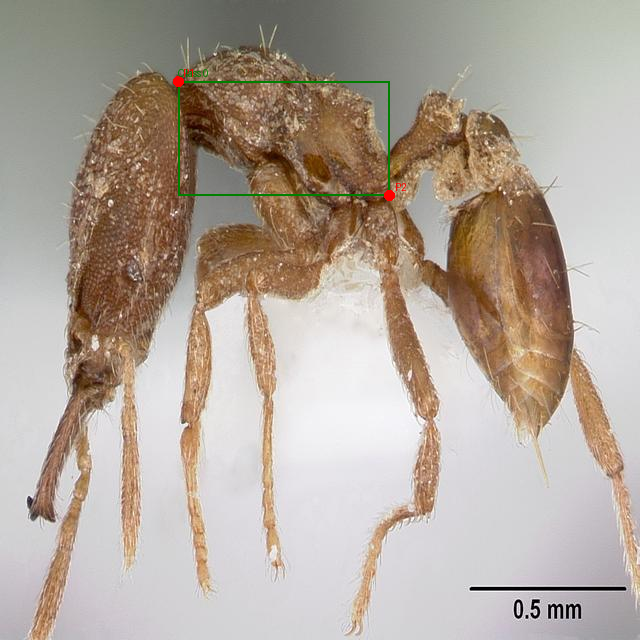

In [3]:
from utils import visualize_single_pair_labels, choose_random_file
file = choose_random_file("./thorax_dataset/images/train")
image_path = f'./thorax_dataset/images/train/{file}'
label_path = f'./thorax_dataset/labels/train/{file.replace(".jpg", ".txt")}'
visualize_single_pair_labels(image_path, label_path)

You can run the cell below to make sure that you are using your current GPU

In [4]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0)) 

PyTorch version: 2.5.1+cu121
CUDA available: True
CUDA version: 12.1
GPU: NVIDIA GeForce RTX 4060 Laptop GPU


hyp.yaml contains the hyperparameters used to fine-tune the model

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data='./thorax_dataset/dataset.yaml', #"./thorax_dataset/dataset.yaml",
    epochs=1,
    batch=16,
    imgsz=640,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./thorax_dataset/dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

train: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_dataset\labels\train.cache... 1105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1105/1105 [00:00<?, ?it/s]

WARNING  No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'



val: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_dataset\labels\val.cache... 370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 370/370 [00:00<?, ?it/s]


Plotting labels to runs\pose\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\pose\train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.84G      2.521       2.23          0      3.051      2.005         22        640:  66%|██████▌   | 46/70 [00:18<00:09,  2.51it/s]


RuntimeError: Caught MemoryError in DataLoader worker process 6.
Original Traceback (most recent call last):
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\_utils\worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\_utils\fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\_utils\fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\base.py", line 288, in __getitem__
    return self.transforms(self.get_image_and_label(index))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\augment.py", line 201, in __call__
    data = t(data)
           ^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\augment.py", line 201, in __call__
    data = t(data)
           ^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\augment.py", line 405, in __call__
    labels = self._mix_transform(labels)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\augment.py", line 595, in _mix_transform
    self._mosaic3(labels) if self.n == 3 else self._mosaic4(labels) if self.n == 4 else self._mosaic9(labels)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\data\augment.py", line 692, in _mosaic4
    img4 = np.full((s * 2, s * 2, img.shape[2]), 114, dtype=np.uint8)  # base image with 4 tiles
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\elyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\numeric.py", line 329, in full
    a = empty(shape, dtype, order)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 4.69 MiB for an array with shape (1280, 1280, 3) and data type uint8


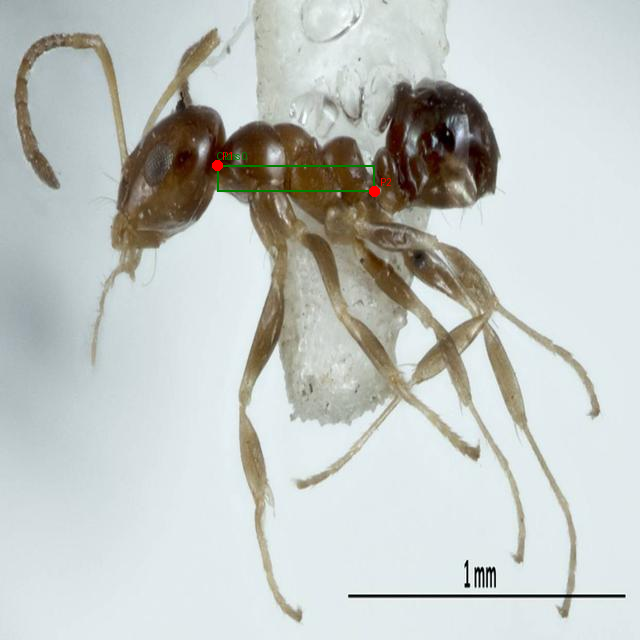

In [5]:
visualize_single_pair_labels('./thorax_dataset/images/test/anic32-066597-2_p_1.jpg', './thorax_dataset/labels/test/anic32-066597-2_p_1.txt')


image 1/1 c:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_dataset\images\test\anic32-900080-1_p_1.jpg: 640x640 1 thorax, 12.3ms
Speed: 1.2ms preprocess, 12.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


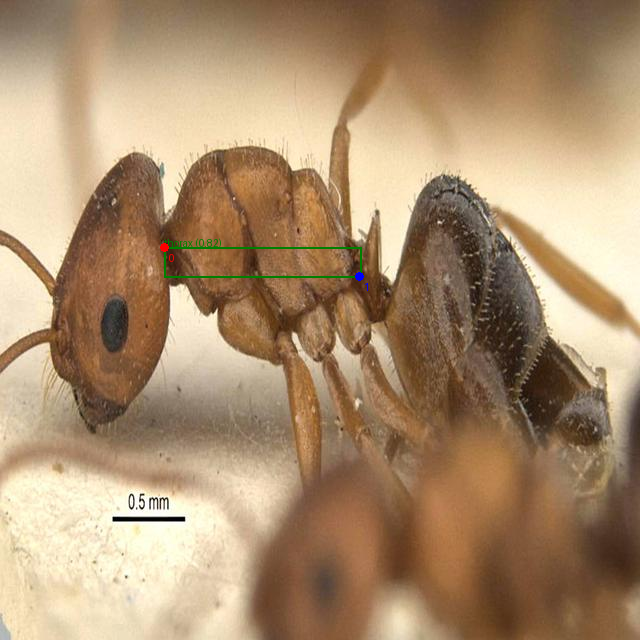

In [15]:
from utils import visualize_predictions
from ultralytics import YOLO

model = YOLO("./best.pt") # You must specify the model you want to use
file = "./thorax_dataset/images/test/anic32-900080-1_p_1.jpg"
results = model.predict(source=file)
visualize_predictions(file, results)

# Scale bar Only

Process to fine-tune Yolov11s-pose.pt to detect only the scale bar inside the image

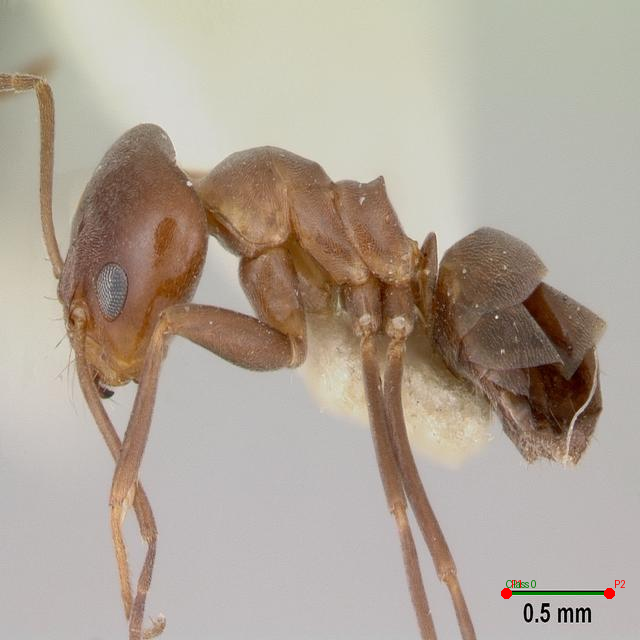

In [17]:
from utils import visualize_single_pair_labels, choose_random_file
file = choose_random_file("./scale_dataset/images/train")
image_path = f'./scale_dataset/images/train/{file}'
label_path = f'./scale_dataset/labels/train/{file.replace(".jpg", ".txt")}'
visualize_single_pair_labels(image_path, label_path)

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data='./scale_dataset/dataset.yaml', #"./thorax_dataset/dataset.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    cfg="hyp.yaml"
    # patience=5,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./scale_dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=50, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\scale_dataset\labels\train.cache... 581 images, 0 backgrounds, 0 corrupt: 100%|██████████| 581/581 [00:00<?, ?it/s]

WARNING  No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'



val: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\scale_dataset\labels\val.cache... 192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<?, ?it/s]


Plotting labels to runs\pose\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\pose\train7
Starting training for 50 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.56G          0          0          0      43.89          0          0        800: 100%|██████████| 37/37 [00:26<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.71G          0          0          0    0.04386          0          0        512: 100%|██████████| 37/37 [00:20<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.86G          0          0          0    0.00701          0          0        768: 100%|██████████| 37/37 [00:29<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.73G          0          0          0   0.001253          0          0        896: 100%|██████████| 37/37 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G          0          0          0  5.181e-06          0          0        576: 100%|██████████| 37/37 [00:25<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G          0          0          0  5.155e-08          0          0        800: 100%|██████████| 37/37 [00:45<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.13s/it]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.8G          0          0          0          0          0          0        832: 100%|██████████| 37/37 [00:47<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50        10G          0          0          0          0          0          0        800: 100%|██████████| 37/37 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.59G          0          0          0          0          0          0        480: 100%|██████████| 37/37 [00:46<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.92G          0          0          0          0          0          0        640: 100%|██████████| 37/37 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.78G          0          0          0          0          0          0        768: 100%|██████████| 37/37 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.3G          0          0          0          0          0          0        416: 100%|██████████| 37/37 [00:20<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.8G          0          0          0          0          0          0        544: 100%|██████████| 37/37 [00:35<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.75G          0          0          0          0          0          0        832: 100%|██████████| 37/37 [00:34<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.5G          0          0          0          0          0          0        448: 100%|██████████| 37/37 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.8G          0          0          0          0          0          0        768: 100%|██████████| 37/37 [00:36<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.99G          0          0          0          0          0          0        320: 100%|██████████| 37/37 [00:38<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.86G          0          0          0          0          0          0        320: 100%|██████████| 37/37 [00:13<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.1G          0          0          0          0          0          0        448: 100%|██████████| 37/37 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.3G          0          0          0          0          0          0        768: 100%|██████████| 37/37 [00:20<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.52G          0          0          0  1.804e-07          0          0        864: 100%|██████████| 37/37 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.51G          0          0          0  5.284e-07          0          0        448: 100%|██████████| 37/37 [00:31<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.5G          0          0          0          0          0          0        800: 100%|██████████| 37/37 [00:27<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.49G          0          0          0          0          0          0        704: 100%|██████████| 37/37 [00:37<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.65G          0          0          0          0          0          0        928: 100%|██████████| 37/37 [00:31<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.9G          0          0          0          0          0          0        704: 100%|██████████| 37/37 [00:34<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.52G          0          0          0  2.577e-07          0          0        608: 100%|██████████| 37/37 [00:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.49G          0          0          0  1.289e-07          0          0        864: 100%|██████████| 37/37 [00:14<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.9G          0          0          0          0          0          0        864: 100%|██████████| 37/37 [00:38<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.89G          0          0          0  1.804e-07          0          0        544: 100%|██████████| 37/37 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G          0          0          0          0          0          0        352: 100%|██████████| 37/37 [00:35<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.1G          0          0          0   1.16e-07          0          0        448: 100%|██████████| 37/37 [00:38<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.96G          0          0          0          0          0          0        928: 100%|██████████| 37/37 [00:32<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.9G          0          0          0  1.418e-07          0          0        864: 100%|██████████| 37/37 [00:34<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.27G          0          0          0  9.021e-08          0          0        352: 100%|██████████| 37/37 [00:19<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.4G          0          0          0  5.155e-08          0          0        416: 100%|██████████| 37/37 [00:23<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.77G          0          0          0  6.444e-08          0          0        832: 100%|██████████| 37/37 [00:33<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.51G          0          0          0          0          0          0        800: 100%|██████████| 37/37 [00:41<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.73G          0          0          0          0          0          0        320: 100%|██████████| 37/37 [00:28<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.79G          0          0          0  5.155e-08          0          0        576: 100%|██████████| 37/37 [00:29<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.3G          0          0          0          0          0          0        736: 100%|██████████| 37/37 [00:23<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G          0          0          0          0          0          0        576: 100%|██████████| 37/37 [00:30<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.6G          0          0          0          0          0          0        384: 100%|██████████| 37/37 [00:20<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.2G          0          0          0          0          0          0        544: 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.69G          0          0          0  2.577e-08          0          0        832: 100%|██████████| 37/37 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.08it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.9G          0          0          0          0          0          0        704: 100%|██████████| 37/37 [00:19<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.53G          0          0          0          0          0          0        896: 100%|██████████| 37/37 [00:31<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.75G          0          0          0  2.577e-08          0          0        544: 100%|██████████| 37/37 [00:27<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.8G          0          0          0          0          0          0        960: 100%|██████████| 37/37 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        192        192          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.58G          0          0          0          0          0          0        832: 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        192        192          0          0          0          0          0          0          0          0



50 epochs completed in 0.470 hours.
Optimizer stripped from runs\pose\train7\weights\last.pt, 19.8MB
Optimizer stripped from runs\pose\train7\weights\best.pt, 19.8MB

Validating runs\pose\train7\weights\best.pt...
Ultralytics 8.3.39  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s-pose summary (fused): 257 layers, 9,699,471 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        192        192          0          0          0          0          0          0          0          0


Speed: 0.2ms preprocess, 7.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\pose\train7


AttributeError: 'PoseMetrics' object has no attribute 'curves_results'. See valid attributes below.

    Calculates and aggregates detection and pose metrics over a given set of classes.

    Args:
        save_dir (Path): Path to the directory where the output plots should be saved. Default is the current directory.
        plot (bool): Whether to save the detection and segmentation plots. Default is False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (list): List of class names. Default is an empty list.

    Attributes:
        save_dir (Path): Path to the directory where the output plots should be saved.
        plot (bool): Whether to save the detection and segmentation plots.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (list): List of class names.
        box (Metric): An instance of the Metric class to calculate box detection metrics.
        pose (Metric): An instance of the Metric class to calculate mask segmentation metrics.
        speed (dict): Dictionary to store the time taken in different phases of inference.

    Methods:
        process(tp_m, tp_b, conf, pred_cls, target_cls): Processes metrics over the given set of predictions.
        mean_results(): Returns the mean of the detection and segmentation metrics over all the classes.
        class_result(i): Returns the detection and segmentation metrics of class `i`.
        maps: Returns the mean Average Precision (mAP) scores for IoU thresholds ranging from 0.50 to 0.95.
        fitness: Returns the fitness scores, which are a single weighted combination of metrics.
        ap_class_index: Returns the list of indices of classes used to compute Average Precision (AP).
        results_dict: Returns the dictionary containing all the detection and segmentation metrics and fitness score.
    

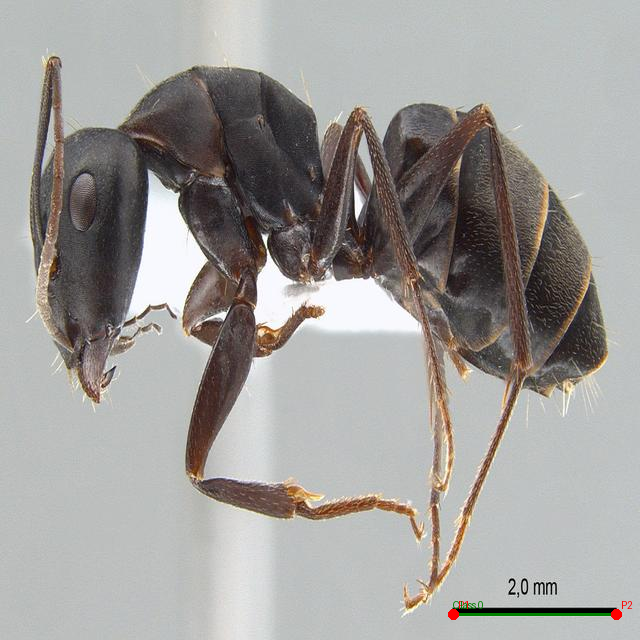

In [4]:
from utils import visualize_single_pair_labels
visualize_single_pair_labels('./scale_dataset/images/test/antweb1008053_p_1.jpg', './scale_dataset/labels/test/antweb1008053_p_1.txt')


image 1/1 c:\Users\elyes\Documents\ml-project-2-win-function-p2\scale_dataset\images\test\antweb1008053_p_1.jpg: 640x640 (no detections), 14.5ms
Speed: 1.0ms preprocess, 14.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


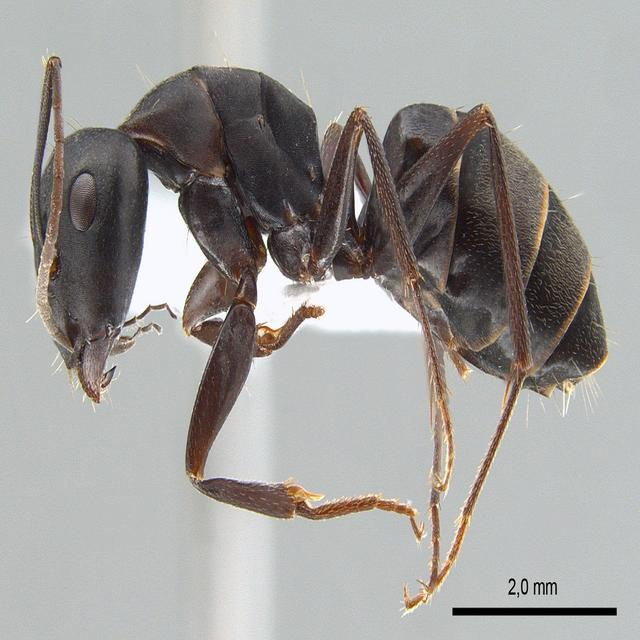

In [7]:
from utils import visualize_predictions
image_path = './scale_dataset/images/test/antweb1008053_p_1.jpg'
model = YOLO(r"C:\Users\elyes\Documents\ml-project-2-win-function-p2\runs\pose\train7\weights\best.pt")
results = model.predict(source=image_path)
visualize_predictions(image_path, results)

# Thorax and Scale Bar

Process to fine-tune Yolov11s-pose.pt to detect both the thorax of an ant and the scale bar

In [8]:
from utils import visualize_double_pair_labels

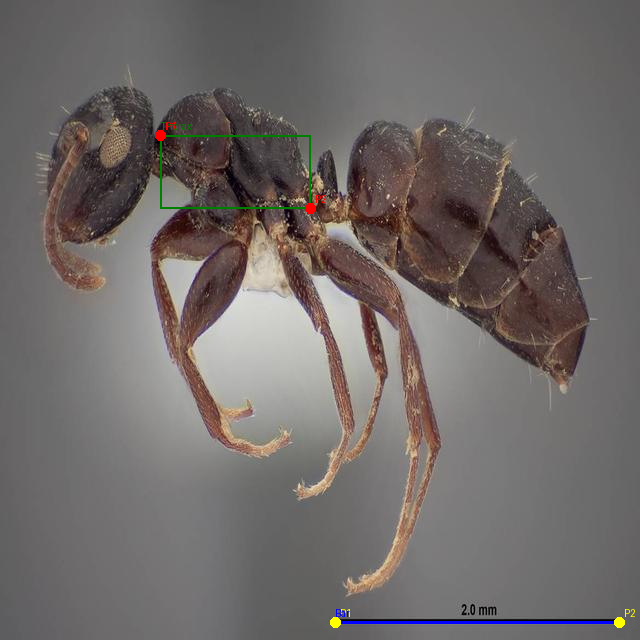

In [9]:
image_path =  './thorax_and_scale_dataset/images/train/fmnhins0000083094_p_1.jpg' #'./thorax_and_scale_dataset/images/train/casent0910427_p_1.jpg'
label_path =  './thorax_and_scale_dataset/labels/train/fmnhins0000083094_p_1.txt' #'./thorax_and_scale_dataset/labels/train/casent0910427_p_1.txt'
visualize_double_pair_labels(image_path, label_path)

In [10]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data="./thorax_and_scale_dataset/dataset.yaml",
    epochs=100,
    batch=16,
    cfg="hyp.yaml"
    imgsz=640,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./thorax_and_scale_dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset\labels\train... 581 images, 0 backgrounds, 0 corrupt: 100%|██████████| 581/581 [00:01<00:00, 499.45it/s]


train: New cache created: C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset\labels\train.cache
WARNING  No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'


val: Scanning C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset\labels\val... 192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<00:00, 245.18it/s]

val: New cache created: C:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset\labels\val.cache


Plotting labels to runs\pose\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\pose\train8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.78G      2.509      6.815          0      3.689      2.185          7        640: 100%|██████████| 37/37 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        192        384      0.719      0.302      0.261      0.117   0.000841       0.13   0.000478   4.85e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.65G      1.961      4.734          0      2.207      1.626         11        640: 100%|██████████| 37/37 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        192        384     0.0122     0.0286    0.00166   0.000473   1.79e-05     0.0026   9.58e-06   1.92e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.7G      1.952      4.372          0      1.932      1.591          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        192        384   0.000374     0.0781   0.000217   5.42e-05      0.503      0.495    0.00598   0.000922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.64G      1.857      4.034          0      1.629      1.501         12        640: 100%|██████████| 37/37 [00:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        192        384      0.314      0.159      0.207     0.0834      0.225      0.429      0.327     0.0946



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.69G      1.838      3.565          0      1.512      1.507          6        640: 100%|██████████| 37/37 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        192        384      0.761      0.242       0.25      0.116      0.804      0.295      0.329      0.118



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.67G      1.725      3.159          0      1.438      1.474          7        640: 100%|██████████| 37/37 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]

                   all        192        384      0.913      0.344      0.382      0.195      0.844      0.294      0.294      0.116



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.68G       1.65      3.061          0      1.403      1.399         11        640: 100%|██████████| 37/37 [00:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        192        384      0.878      0.346      0.375      0.187      0.874      0.365      0.381      0.257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.64G      1.626      2.594          0       1.28      1.379         11        640: 100%|██████████| 37/37 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        192        384      0.909      0.291      0.349       0.17      0.899      0.299       0.36      0.256



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.68G      1.655      2.477          0      1.325      1.341          4        640: 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        192        384      0.872       0.31       0.37        0.2       0.84      0.284      0.338      0.186



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.67G      1.605      2.549          0      1.264      1.364         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        192        384       0.41      0.367      0.392      0.221        0.4      0.328      0.326      0.175



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.68G      1.559      2.408          0      1.233       1.35          8        640: 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        192        384      0.911      0.336      0.378      0.203      0.928      0.354      0.383      0.288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.64G      1.561      2.152          0      1.147      1.329         13        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        192        384       0.39      0.349      0.388      0.204       0.37       0.37      0.389      0.296



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.68G      1.621      2.194          0      1.223       1.36          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        192        384       0.91      0.365      0.393      0.215      0.895      0.364      0.383      0.263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.67G      1.516      2.087          0      1.126      1.326          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        192        384      0.411      0.361      0.391      0.213      0.407      0.359       0.38      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.68G      1.475      2.163          0      1.083      1.297          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.427      0.385      0.415       0.23      0.422      0.378      0.392      0.242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.64G      1.477      1.888          0      1.083      1.322          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        192        384      0.439      0.392       0.43      0.246      0.437      0.397      0.418      0.333



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.69G      1.476      1.925          0      1.087      1.279         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        192        384      0.408      0.405      0.425      0.259      0.429      0.359      0.399      0.216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.67G      1.459      1.806          0      1.084      1.289          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        192        384      0.447      0.373       0.42      0.248      0.442      0.375      0.414      0.281



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.67G      1.443      2.006          0      1.082      1.241          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        192        384       0.45      0.378      0.416      0.253      0.443      0.388      0.425      0.328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.64G      1.463      1.907          0      1.091      1.288         14        640: 100%|██████████| 37/37 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        192        384      0.443      0.372       0.41      0.242      0.431      0.422      0.457      0.376



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100       4.7G      1.364       1.71          0      1.004      1.227          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        192        384       0.42      0.375      0.402      0.228      0.428      0.414      0.441      0.353



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.67G      1.369      1.622          0      1.005      1.236         13        640: 100%|██████████| 37/37 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        192        384      0.454      0.387      0.424       0.26      0.455      0.391      0.423      0.241



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.67G      1.371      1.734          0     0.9899      1.249         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        192        384      0.441      0.401      0.432      0.263       0.45      0.403      0.442      0.344



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.64G      1.385      1.611          0     0.9776      1.267         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        192        384      0.438      0.398       0.43      0.249      0.454      0.411      0.451      0.325



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.69G      1.389      1.548          0      1.002       1.27          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        192        384      0.448      0.378      0.421      0.257      0.453      0.375      0.427      0.308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.67G      1.375      1.566          0     0.9844      1.243          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        192        384      0.455      0.388      0.435      0.263      0.431      0.388      0.417        0.3



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.67G      1.383       1.52          0      1.015       1.24          8        640: 100%|██████████| 37/37 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        192        384      0.428      0.383      0.428      0.263      0.449      0.414      0.462      0.407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.64G      1.341      1.551          0      1.005      1.207         12        640: 100%|██████████| 37/37 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.452      0.371      0.431      0.244      0.462       0.38      0.442      0.386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100       4.7G      1.399      1.449          0      1.054      1.246         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384       0.45      0.404       0.44      0.275      0.465      0.422      0.454      0.323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.67G      1.315      1.369          0      0.962      1.214          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384      0.444      0.409      0.442      0.276      0.466      0.427      0.463      0.391



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.67G      1.277      1.347          0     0.9337      1.209         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        192        384      0.458      0.391       0.43      0.266      0.465      0.427      0.474      0.375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.64G      1.243      1.083          0     0.9024      1.183          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        192        384      0.957      0.409      0.447      0.283      0.957      0.409       0.44      0.341



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100       4.7G      1.261      1.189          0     0.8987      1.192          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        192        384      0.926      0.401      0.431      0.264      0.953      0.424      0.452      0.385



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.67G      1.274      1.302          0     0.8983      1.201          6        640: 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384      0.951      0.393      0.442      0.279      0.967      0.439      0.479      0.402



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.67G      1.229      1.294          0      0.872      1.176         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        192        384      0.971      0.406      0.448      0.284      0.983      0.433      0.478      0.387



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.64G      1.309      1.236          0     0.9131      1.193         14        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        192        384      0.941      0.406       0.44      0.279      0.979      0.435      0.482      0.428



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.7G      1.284       1.29          0     0.8968      1.174          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        192        384      0.442      0.411      0.444      0.281      0.457      0.414      0.453       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.67G      1.235      1.156          0     0.8567      1.157          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        192        384      0.464      0.398      0.444      0.275      0.474      0.432      0.473      0.415



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.67G      1.171      1.024          0     0.8257      1.148          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        192        384       0.45      0.418      0.444      0.285      0.465      0.453      0.489      0.446



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.64G      1.179      1.039          0      0.812      1.163          6        640: 100%|██████████| 37/37 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        192        384      0.458      0.401      0.452      0.273      0.464      0.437      0.469      0.404



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.7G       1.23      1.039          0       0.86      1.162          8        640: 100%|██████████| 37/37 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        192        384      0.455      0.397       0.44      0.278      0.456       0.43      0.465      0.392



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.67G      1.224      1.211          0     0.8683      1.165         12        640: 100%|██████████| 37/37 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        192        384      0.442      0.413      0.433      0.286      0.483      0.452      0.482      0.444



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.67G      1.254      1.222          0     0.9212      1.167          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.439      0.391      0.439      0.277      0.465      0.419      0.474      0.415



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.64G      1.218      1.235          0     0.8652      1.163          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.455        0.4      0.441      0.283      0.473      0.448       0.48      0.438



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100       4.7G      1.219      1.028          0      0.807      1.168          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        192        384      0.456      0.404      0.445      0.268      0.454      0.451      0.485      0.442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.67G      1.171      1.107          0     0.8144      1.144          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        192        384      0.465      0.393      0.447       0.29      0.466       0.44      0.477      0.395



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.67G      1.155     0.9901          0     0.8094      1.133          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        192        384      0.427      0.395      0.432      0.281      0.455      0.448       0.48      0.439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.64G       1.15      1.033          0     0.8161      1.134          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        192        384      0.461      0.404      0.436      0.277       0.49       0.43      0.479      0.439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100       4.7G      1.167      1.056          0     0.8316      1.148          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        192        384      0.449      0.417      0.443      0.282      0.479      0.445      0.486      0.444



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.67G      1.183      1.093          0     0.8287      1.137          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.454      0.413      0.444      0.265      0.485       0.44      0.483       0.44



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.67G      1.178     0.9323          0       0.83      1.132          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        192        384      0.452      0.419      0.447      0.287      0.475      0.441      0.478      0.425



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.64G      1.113       1.09          0     0.7888      1.124         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        192        384       0.46       0.43      0.451      0.279      0.486      0.455      0.482      0.434



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100       4.7G       1.12      1.122          0     0.8119      1.116          4        640: 100%|██████████| 37/37 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384      0.465      0.414      0.449      0.289      0.491       0.45      0.489      0.438



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.67G      1.113      0.988          0     0.7892      1.118          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        192        384      0.466      0.409      0.444      0.287      0.491       0.44      0.483       0.45



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.67G      1.156      1.075          0     0.8045      1.138          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        192        384      0.446       0.43      0.451      0.272      0.479      0.475      0.488       0.46



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.64G      1.102      1.049          0     0.7612      1.113          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        192        384      0.473      0.414      0.456      0.288      0.471      0.474      0.484      0.438



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100       4.7G      1.056     0.9077          0     0.7473      1.099          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        192        384      0.457      0.415      0.454      0.289      0.475      0.451      0.482      0.446



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.67G      1.051     0.9608          0     0.7552      1.087          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        192        384      0.454      0.409      0.435      0.279      0.484      0.448      0.484       0.45



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.67G      1.088       1.02          0     0.8102      1.109          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        192        384      0.455      0.409       0.44      0.289      0.484       0.44      0.482      0.435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.64G      1.058      0.892          0     0.7669      1.073         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        192        384       0.44       0.42      0.447      0.281      0.472      0.445      0.485      0.439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100       4.7G      1.024     0.8202          0     0.7348      1.088         10        640: 100%|██████████| 37/37 [00:08<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]

                   all        192        384      0.456      0.419      0.453      0.292      0.476      0.471       0.49       0.45



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.67G      1.035      0.872          0     0.7438      1.091          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        192        384      0.448        0.4      0.443      0.291      0.473      0.445      0.481       0.45



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.67G      1.027     0.9243          0     0.7507      1.082          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        192        384      0.459      0.435      0.458      0.288      0.484      0.459      0.484      0.452



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.64G      1.022      0.871          0     0.7116      1.072         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        192        384      0.434      0.428      0.453      0.284      0.474      0.467      0.489      0.461



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.69G     0.9784     0.7272          0     0.6904      1.048          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        192        384      0.462      0.417      0.449      0.293      0.492      0.453      0.485      0.424



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.67G     0.9995     0.8149          0     0.7308      1.065         12        640: 100%|██████████| 37/37 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        192        384      0.465      0.417      0.454      0.293       0.47      0.461      0.483      0.442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.67G     0.9725     0.7447          0     0.6746      1.041          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        192        384      0.446      0.419      0.447      0.291      0.459      0.471      0.483      0.421



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.64G      1.021     0.9223          0     0.7354      1.077         14        640: 100%|██████████| 37/37 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384       0.45      0.426      0.446      0.285      0.476      0.471      0.489      0.462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100       4.7G     0.9824     0.8101          0     0.7124      1.043         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        192        384      0.455       0.43      0.453      0.297       0.48      0.464      0.485      0.456



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.67G     0.9255     0.7019          0     0.6748       1.03          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        192        384      0.457      0.413      0.445      0.288      0.483      0.453      0.484      0.452



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.67G     0.9821     0.7586          0     0.6737      1.046         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        192        384      0.459      0.411      0.448      0.293      0.487      0.478      0.491      0.464



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.64G     0.9419     0.7653          0     0.6701      1.035         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        192        384      0.451      0.428      0.451      0.295      0.477      0.477       0.49      0.464



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100       4.7G     0.9779     0.7121          0     0.7012      1.062          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        192        384      0.453      0.427      0.449      0.288      0.481      0.472      0.487      0.464



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.67G     0.9387     0.6962          0      0.669       1.05          6        640: 100%|██████████| 37/37 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        192        384      0.473      0.416      0.454      0.286      0.489      0.462      0.488       0.46



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.67G     0.9346     0.7584          0     0.6902      1.037          9        640: 100%|██████████| 37/37 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        192        384      0.455      0.424      0.451      0.292      0.487       0.48      0.494      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.64G     0.9544      0.762          0     0.6917      1.052          6        640: 100%|██████████| 37/37 [00:09<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        192        384      0.459      0.438      0.457      0.294      0.492       0.47      0.491      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100       4.7G     0.9121     0.6348          0     0.6505      1.039          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        192        384      0.464       0.43      0.458      0.298      0.484      0.473      0.493      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.67G     0.8912     0.7098          0     0.6561      1.036         13        640: 100%|██████████| 37/37 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        192        384      0.457      0.417      0.448      0.297      0.486      0.463      0.488      0.459



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.67G     0.9304     0.6848          0     0.6693      1.042          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        192        384      0.458      0.424      0.443      0.294      0.485      0.479      0.492      0.465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.64G      0.942     0.7023          0     0.6677      1.044         10        640: 100%|██████████| 37/37 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        192        384      0.453      0.419      0.441       0.29      0.491      0.469      0.494      0.465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100       4.7G     0.8999      0.648          0     0.6514      1.029          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        192        384      0.458      0.424      0.451      0.299      0.483      0.477      0.493      0.465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.67G     0.8854     0.6156          0      0.619      1.033          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        192        384      0.462      0.424      0.451        0.3      0.488      0.469      0.494       0.46



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.67G      0.866     0.6097          0     0.6296      1.011          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        192        384      0.461      0.427      0.452      0.298      0.497       0.46      0.489      0.459



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.64G     0.8658     0.6049          0     0.6424      1.024          9        640: 100%|██████████| 37/37 [00:09<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        192        384      0.458       0.43      0.451      0.298      0.489      0.479      0.493      0.462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.7G     0.8754     0.5953          0     0.6296      1.014         12        640: 100%|██████████| 37/37 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        192        384      0.456      0.435      0.446      0.292      0.487      0.469      0.483      0.451



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.67G      0.861     0.6546          0     0.6446      1.025          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        192        384      0.458      0.438      0.457      0.299      0.487      0.478      0.489      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.67G     0.8236      0.533          0     0.5943      1.013         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        192        384      0.459      0.432      0.458      0.295      0.484      0.471      0.489      0.464



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.64G     0.8603     0.5376          0     0.6298      1.019          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        192        384      0.463      0.435      0.451      0.293      0.487      0.469      0.488      0.462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.7G     0.8313     0.5362          0     0.6028      1.003          8        640: 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        192        384       0.46      0.432      0.449        0.3      0.486      0.477      0.495      0.463



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.67G     0.8046      0.489          0      0.575     0.9993          5        640: 100%|██████████| 37/37 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        192        384      0.459      0.435      0.455      0.302      0.484      0.471      0.491      0.462


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.67G     0.6649     0.3582          0     0.4119     0.9298          5        640: 100%|██████████| 37/37 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        192        384      0.456      0.428      0.452      0.297      0.494      0.466      0.493       0.46



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.64G     0.6578     0.3492          0     0.4162     0.9239          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        192        384      0.457       0.44      0.454      0.297      0.495      0.478      0.496      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.7G     0.6575      0.318          0     0.4002     0.9284          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        192        384      0.459      0.433      0.453        0.3      0.482      0.487      0.493      0.465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.67G     0.6544     0.3128          0     0.3997     0.9202          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        192        384      0.461      0.429      0.449      0.295      0.492      0.474      0.493      0.463



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.67G     0.6379      0.246          0     0.4006     0.9236          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        192        384      0.451      0.424      0.449        0.3      0.487      0.474      0.493      0.468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.64G     0.6106     0.2821          0     0.3847      0.903          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        192        384      0.449      0.432      0.451      0.301      0.493      0.477      0.493      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.69G     0.6302     0.2727          0     0.3846     0.9223          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        192        384      0.455      0.435      0.455      0.299      0.491      0.479      0.496      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.67G     0.6018     0.2675          0     0.3873     0.9029          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        192        384       0.46       0.43      0.452      0.301      0.487      0.477      0.494      0.467



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.67G     0.5947     0.2819          0     0.3745     0.9089          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        192        384      0.456      0.422       0.45      0.303      0.487      0.484      0.494      0.467



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.64G      0.579     0.2483          0     0.3687      0.904          5        640: 100%|██████████| 37/37 [00:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

                   all        192        384      0.458      0.426      0.451      0.301      0.484      0.487      0.494      0.467



100 epochs completed in 0.362 hours.
Optimizer stripped from runs\pose\train8\weights\last.pt, 19.8MB
Optimizer stripped from runs\pose\train8\weights\best.pt, 19.8MB

Validating runs\pose\train8\weights\best.pt...
Ultralytics 8.3.39  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s-pose summary (fused): 257 layers, 9,700,254 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]


                   all        192        384      0.456      0.422       0.45      0.303      0.487      0.483      0.494      0.467
                thorax        192        192      0.912      0.844        0.9      0.607      0.974      0.966      0.987      0.934
                   bar        192        192          0          0          0          0          0          0          0          0
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\pose\train8


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028E83A1D8D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410


image 1/1 c:\Users\elyes\Documents\ml-project-2-win-function-p2\thorax_and_scale_dataset\images\train\anic32-066653_p_1.jpg: 640x640 1 thorax, 76.4ms
Speed: 4.0ms preprocess, 76.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


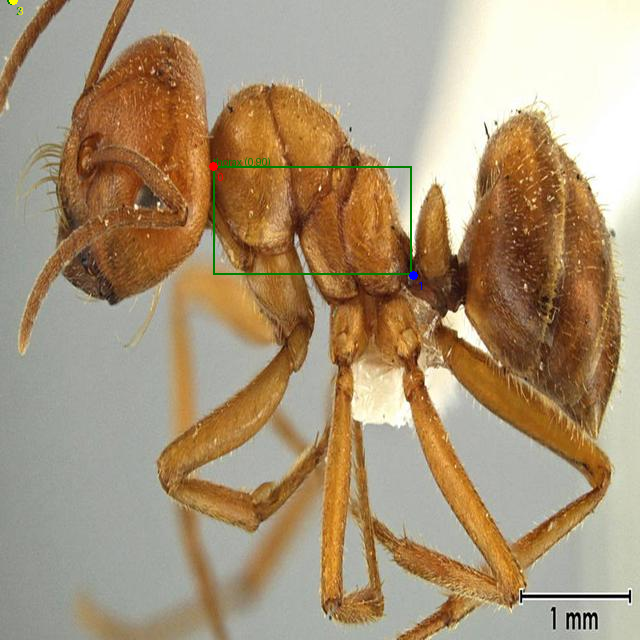

In [13]:
from utils import visualize_predictions
image_path = './thorax_and_scale_dataset/images/train/anic32-066653_p_1.jpg'
results = model.predict(source=image_path)
visualize_predictions(image_path, results)